In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\Data-Science\\Kaggle files\\datasets\\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, 4]

* state column has a classification indexes
* we need to do one_hot encoding

In [21]:
states = pd.get_dummies(X['State'], drop_first=True)
# states

In [22]:
# drop the state column
X = X.drop('State', axis=1)

In [23]:
# add onehot encoded state column to X
X = pd.concat([X, states], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [24]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

In [25]:
# multivariable Linear Regression model
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X_train, y_train)

LinearRegression()

In [50]:
# calculating coeff :

coeff = pd.DataFrame(X_train.columns, columns=['Weights'])
coeff['Coefficeint estimate'] = pd.Series(lreg.coef_)

In [51]:
# shows weights
coeff

,Weights,Coefficeint estimate
0,R&D Spend,0.765850
1,Administration,-0.007614
2,Marketing Spend,0.016155
3,Florida,1330.510303
4,New York,-1189.637300


In [28]:
y_pred = lreg.predict(X_test)

In [37]:
y_test.values

array([ 97427.84, 141585.52, 107404.34,  42559.73,  96778.92, 110352.25,
       182901.99,  99937.59, 105733.54, 191792.06,  96479.51,  77798.83,
       126992.93,  14681.4 , 134307.35, 108733.99, 144259.4 ])

In [30]:
y_pred

array([101216.21577054, 129176.74381128, 103583.61820569,  51862.76733588,
        99407.24776544, 114858.45330183, 167558.95692568, 102294.63960567,
       112983.17094233, 183437.99627284,  89616.74341973,  77598.29224934,
       115984.955341  ,  52732.97901001, 126396.45341401, 110062.61132289,
       133329.30588026])

In [38]:
# r2_score

from sklearn.metrics import r2_score, mean_squared_error

In [39]:
r2_score(y_test, y_pred)

0.9189822961791583

* 91.8 % which is a good model for this data set.

* r2_score > 0.8

In [44]:
r = mean_squared_error(y_test, y_pred)
r

144708836.2468753

In [43]:
import math

math.sqrt(r)

12029.498586677471

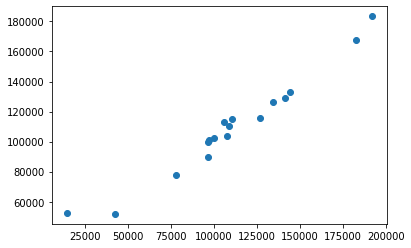

In [65]:
plt.scatter(y_test, y_pred);

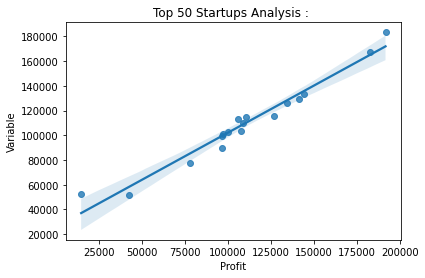

In [80]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Profit')
plt.ylabel('Variable')
plt.title('Top 50 Startups Analysis : ');